<a href="https://colab.research.google.com/github/gaeun0915/gaeun0915/blob/main/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC_%EC%84%A0%ED%98%84%ED%9A%8C%EA%B7%80_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0(%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91%EA%B0%92_%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

0.5

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true,y_pred)


0.375

In [ ]:
from math import sqrt

sqrt(mean_squared_error(y_true,y_pred))

0.6123724356957945

In [ ]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true,y_pred)

0.9486081370449679

02. 과대적합과 정규화

In [ ]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

boston = load_boston()
boston.keys()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
x_data=boston.data
y_data=boston.target.reshape(boston.target.size,1)
y_data.shape

(506, 1)

In [ ]:
from sklearn import preprocessing
minmax_scale =preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data)
x_scaled_data=minmax_scale.transform(x_data)
x_scaled_data[:3]


array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(x_scaled_data,y_data,test_size=0.33)

X_train.shape,X_test.shape, y_train.shape,y_test.shape

((339, 13), (167, 13), (339, 1), (167, 1))

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression(
         fit_intercept=True,normalize=False,copy_X=True, n_jobs=-1)
lasso_regr = linear_model.Lasso(
        alpha=0.01, fit_intercept=True,normalize=False,copy_X=True)
ridge_regr = linear_model.Ridge(
        alpha=0.01,fit_intercept= True, normalize=False,copy_X=True)
SGD_regr = linear_model.SGDRegressor(penalty="l2",alpha=0.01,
                                     max_iter=1000,tol=0.001,eta0=0.01)

In [ ]:
regr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(n_jobs=-1, normalize=False)

In [ ]:
print('Coefficient:',regr.coef_)
print('intercept:',regr.intercept_)

Coefficient: [[-1.68482824  0.71625688  0.14007906  0.47388286 -1.51525485  4.83635905
  -0.42956555 -3.18594714  1.1285887  -1.17154212 -1.87510291  0.82507362
  -2.72382064]]
intercept: [23.91126348]


In [ ]:
regr.predict(x_data[:5])

array([[-33.36738055],
       [ -6.57526973],
       [ 15.32668295],
       [ 44.15476377],
       [ 36.56821692]])

In [ ]:
x_data[:5].dot(regr.coef_.T) + regr.intercept_

array([[-33.36738055],
       [ -6.57526973],
       [ 15.32668295],
       [ 44.15476377],
       [ 36.56821692]])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true=y_test.copy()
y_hat = regr.predict(X_test)

r2_score(y_true,y_hat),mean_absolute_error(y_true,y_hat),mean_
squared_error(y_true,y_hat)

NameError: ignored

Text(0.5, 1.0, 'Prices vs Predicted prices :$Y_i$ vs $＼hat{y}i$ ')

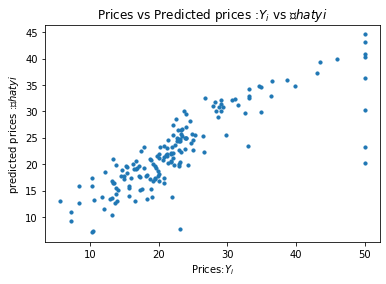

In [ ]:
plt.scatter(y_true,y_hat,s=10)
plt.xlabel("Prices:$Y_i$")
plt.ylabel("predicted prices :$＼hat{y}i$")
plt.title("Prices vs Predicted prices :$Y_i$ vs $＼hat{y}i$ ")


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (20.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype